# IVÁN FALCÓN MONZÓN

**Actividad 3.4 -** Representación plot de datasets, selección de características y entrenamiento de modelos

# 1. Descripción del Dataset

**Descargar dataset:** https://archive.ics.uci.edu/dataset/183/communities+and+crime

**Origen del Dataset**

El conjunto de datos "Communities and Crime" proviene de un análisis realizado sobre comunidades en los Estados Unidos. Combina datos socioeconómicos del censo de 1990, datos policiales de la encuesta LEMAS de 1990, y datos de crímenes del informe UCR del FBI de 1995.

* Número de instancias: 1.994.
* Número de atributos: 128.
* Tareas asociadas: Regresión.
* Valores faltantes: Sí.
* Área de estudio: Social.

**Propósito del Dataset**

El dataset se utiliza principalmente para modelar problemas relacionados con la tasa de criminalidad y explorar cómo diversos factores socioeconómicos y características comunitarias afectan los niveles de delincuencia.



**Análisis Inicial de las Características**

El archivo de datos contiene valores numéricos y categóricos, separados por comas. Algunos campos están vacíos, lo que indica valores faltantes. Las características incluyen:

* Identificadores: Campos que identifican comunidades o regiones (e.g., nombres de ciudades, códigos numéricos).
* Factores demográficos: Proporciones relacionadas con la raza, la educación, y la pobreza.
* Indicadores económicos: Tasas de desempleo, ingresos, etc.
* Factores policiales: Información sobre presencia y desempeño de fuerzas policiales.
* Tasa de crímenes: Valores que pueden actuar como objetivos de predicción.

In [1]:
# IVAN FALCON MONZON
# Instalación del paquete necesario para descargar y cargar el dataset
!pip install ucimlrepo

In [2]:
# IVAN FALCON MONZON
# Cargar librerías necesarias
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Obtener el dataset Communities and Crime
dataset = fetch_ucirepo(id=183)  # ID del dataset en UCI Machine Learning Repository

# Convertir a DataFrame
X = pd.DataFrame(dataset.data.features, columns=dataset.data.headers[:-1])

# Convertir 'targets' a un array de numpy y aplanarlo
y = pd.Series(dataset.data.targets.to_numpy().flatten(), name=dataset.data.headers[-1])

# Mostrar primeras filas del dataset
print(X.head())
print(y.head())

   state county community        communityname  fold  population  \
0      8      ?         ?         Lakewoodcity     1        0.19   
1     53      ?         ?          Tukwilacity     1        0.00   
2     24      ?         ?         Aberdeentown     1        0.00   
3     34      5     81440  Willingborotownship     1        0.04   
4     42     95      6096    Bethlehemtownship     1        0.01   

   householdsize  racepctblack  racePctWhite  racePctAsian  ...  \
0           0.33          0.02          0.90          0.12  ...   
1           0.16          0.12          0.74          0.45  ...   
2           0.42          0.49          0.56          0.17  ...   
3           0.77          1.00          0.08          0.12  ...   
4           0.55          0.02          0.95          0.09  ...   

   PolicAveOTWorked  LandArea  PopDens  PctUsePubTrans  PolicCars  \
0              0.29      0.12     0.26            0.20       0.06   
1                 ?      0.02     0.12            

# **2. Procesamiento de Datos**

In [3]:
# Librerías necesarias
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from ucimlrepo import fetch_ucirepo

**Manejo de Valores Faltantes**

In [4]:
# IVAN FALCON MONZON
# Manejo de valores faltantes
X.replace("?", np.nan, inplace=True)  # Reemplaza '?' por NaN
X = X.apply(pd.to_numeric, errors='coerce')  # Convierte todo a numérico

# Eliminar columnas con todos los valores NaN
X.dropna(axis=1, how='all', inplace=True)

# Imputar valores NaN con la mediana
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Verificar si aún hay valores NaN después de la imputación
if X.isnull().sum().sum() > 0:
    print("Advertencia: Aún quedan valores NaN en X después de la imputación.")
    X.dropna(inplace=True)  # Eliminar filas con NaN restantes como último recurso
    y = y.loc[X.index]  # Asegurar que y coincida con X

# Asegurar que X e y tienen las mismas filas
y = y.loc[X.index]

print("Valores faltantes tratados correctamente.")

Valores faltantes tratados correctamente.


**Normalización de Datos**

In [5]:
# Normalización de datos
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

# **3. Selección de Características**

**3.1. Matriz de Correlación**

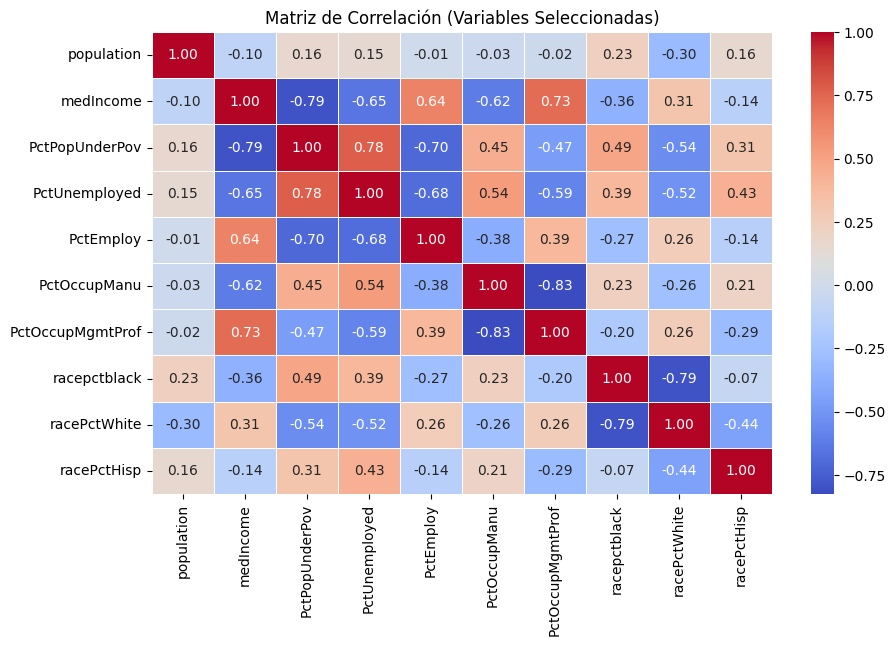

In [6]:
# IVAN FALCON MONZON
# Importamos las librerías necesarias
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos un subconjunto de características relevantes para reducir la cantidad de datos en la matriz
variables_seleccionadas = [
    "population", "medIncome", "PctPopUnderPov", "PctUnemployed",
    "PctEmploy", "PctOccupManu", "PctOccupMgmtProf", "racepctblack",
    "racePctWhite", "racePctHisp"
]

# Verificamos que las variables seleccionadas existen en X
X_sub = X[variables_seleccionadas].copy()

# Configuramos la figura para la matriz de correlación
plt.figure(figsize=(10, 6))  # Ajustamos el tamaño para mejor visualización

# Generamos el mapa de calor de correlaciones con las variables seleccionadas
sns.heatmap(
    X_sub.corr(),  # Calculamos la matriz de correlación de las variables seleccionadas
    annot=True,    # Mostramos los valores de correlación en el gráfico
    cmap="coolwarm",  # Esquema de colores para mejor interpretación
    fmt=".2f",   # Mostramos valores con 2 decimales
    linewidths=0.5  # Ajustamos el espacio entre celdas
)

# Agregamos el título al gráfico
plt.title("Matriz de Correlación (Variables Seleccionadas)")

# Mostramos el gráfico
plt.show()

**3.2. Matriz de Gráficos de Dispersión**

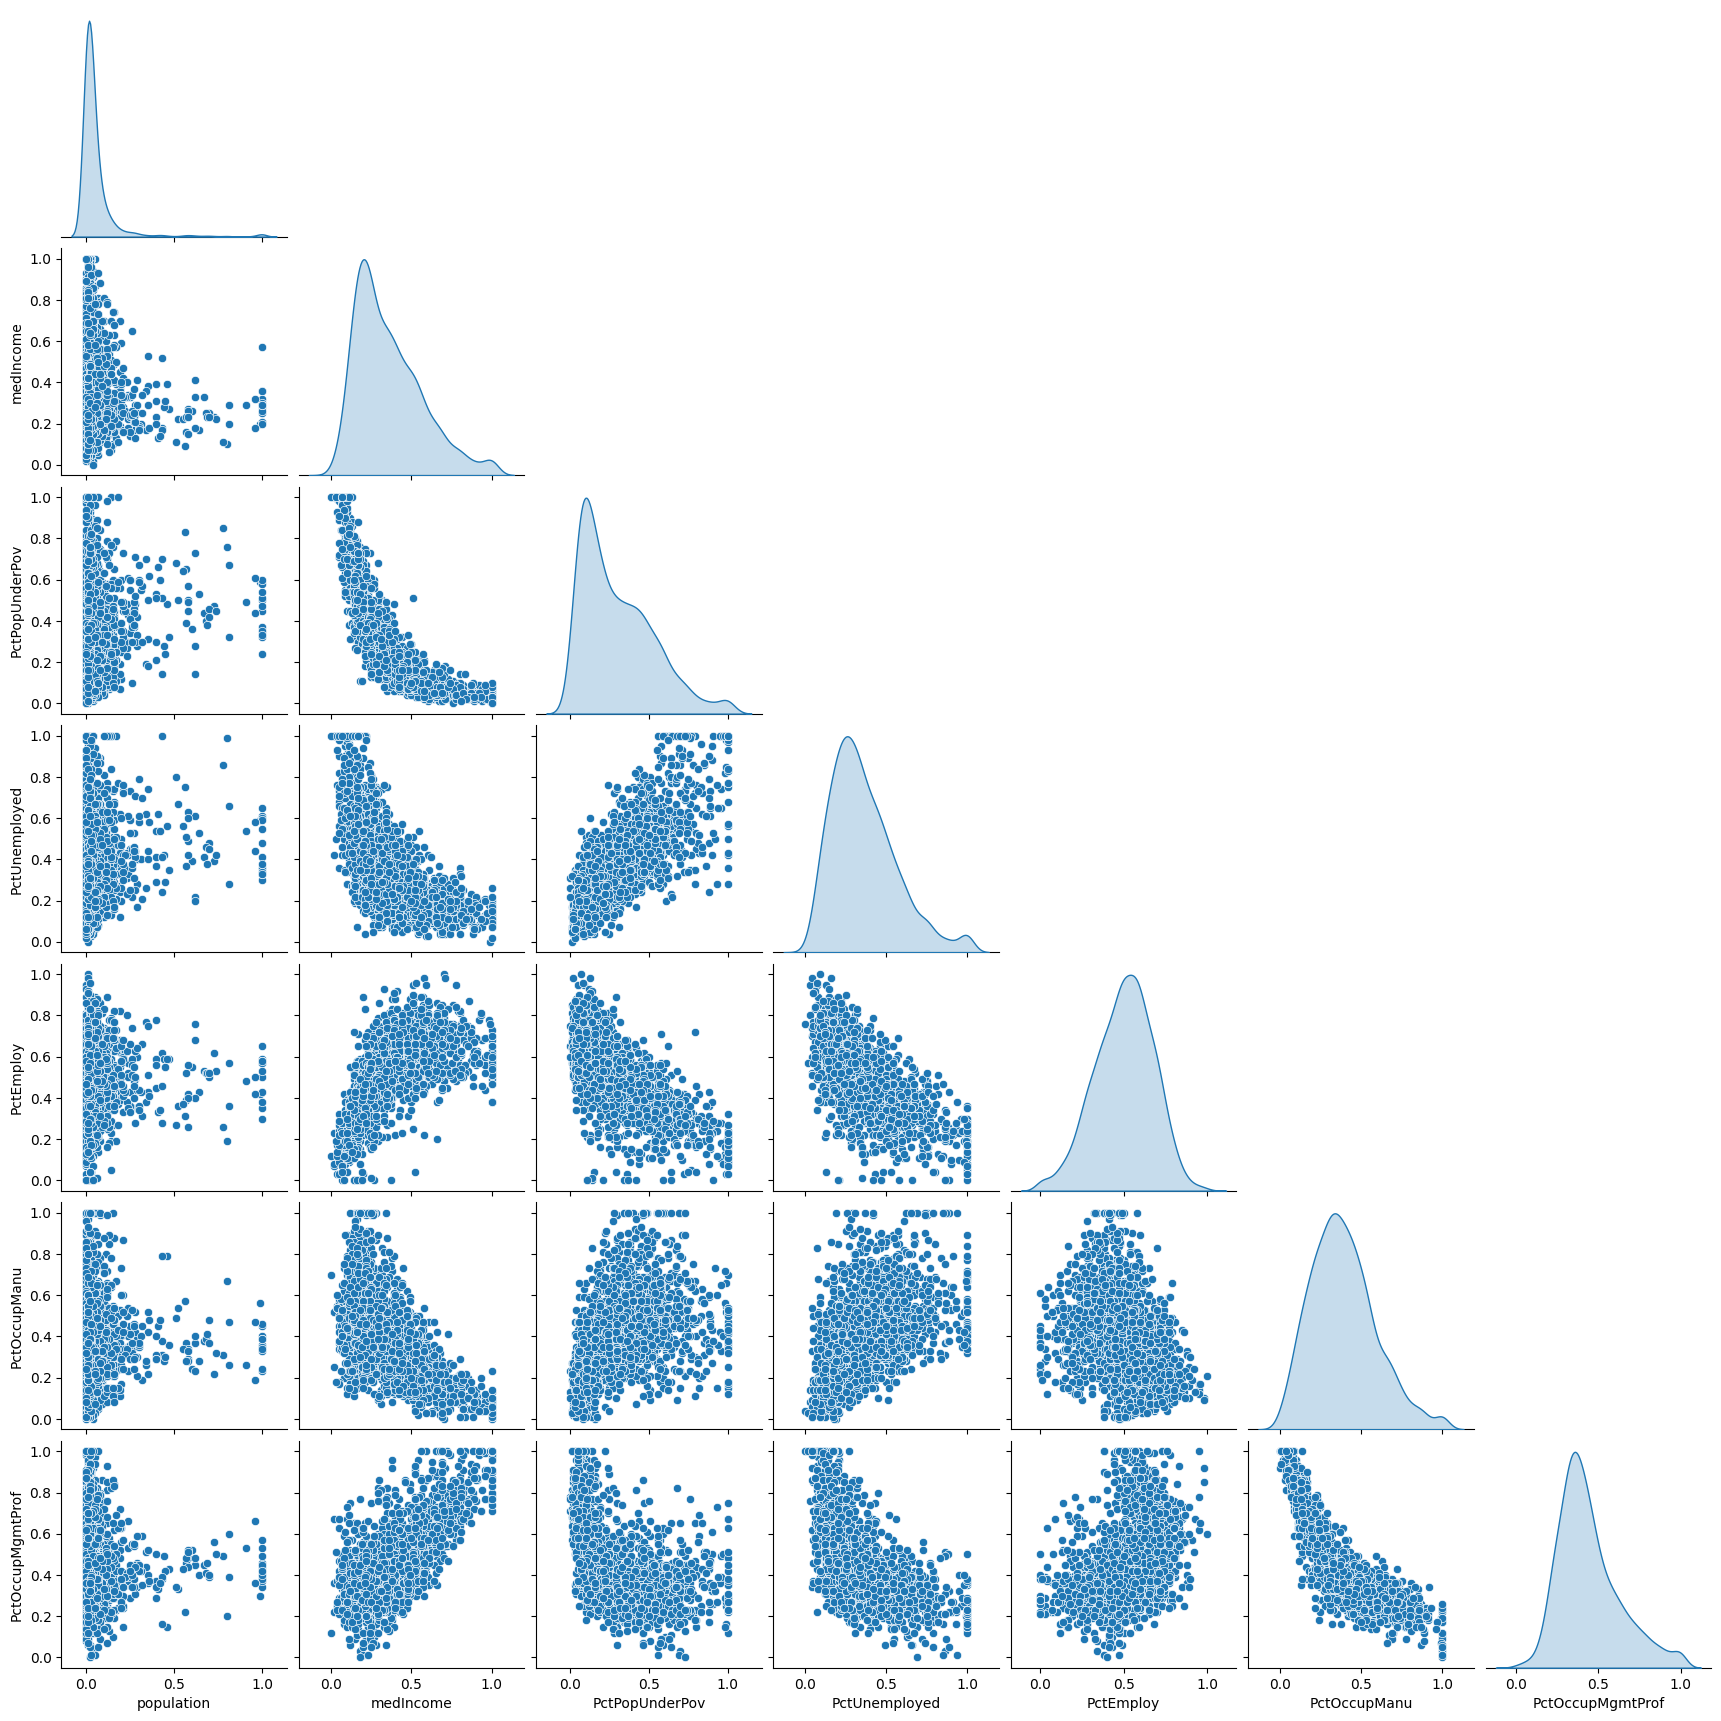

In [7]:
# IVAN FALCON MONZON
# Importamos las librerías necesarias
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos un subconjunto de variables para reducir el tiempo de ejecución
variables_seleccionadas = [
    "population", "medIncome", "PctPopUnderPov", "PctUnemployed",
    "PctEmploy", "PctOccupManu", "PctOccupMgmtProf"
]

# Creamos un nuevo DataFrame solo con las variables seleccionadas
X_sub = X[variables_seleccionadas].copy()

# Generamos el gráfico de dispersión con las variables seleccionadas
sns.pairplot(X_sub, corner=True, diag_kind="kde")  # Usamos densidad en la diagonal para mejor visualización

# Mostramos el gráfico
plt.show()

 **3.3. Selección con SelectKBest** (Modelo entrenado)

In [8]:
# Aplicar SelectKBest
k = min(5, X.shape[1])  # Asegurar que k no sea mayor que el número de características
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
X_selected = pd.DataFrame(X_new, columns=selected_features)

# Clasificación binaria de y
y_clas = (y > y.median()).astype(int)

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_clas, test_size=0.2, random_state=42)

# Entrenar el modelo
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8320802005012531


# **4.  Reflexión sobre la elección de las características elegidas**

**Matriz de Correlación:**
* Proporciona una visión clara de las relaciones lineales entre las variables seleccionadas. Las variables socioeconómicas, como el ingreso medio y el porcentaje de desempleo, muestran relaciones fuertes entre sí, lo que sugiere que estas características están vinculadas a fenómenos socioeconómicos comunes, como el nivel de pobreza y las tasas de criminalidad.

**Matriz de Gráficos de Dispersión (Pairplot):**
* El pairplot revela visualmente las interacciones entre las variables seleccionadas. Permite identificar relaciones no lineales y patrones complejos que no son tan evidentes en la matriz de correlación. Este gráfico es útil para detectar posibles agrupamientos o tendencias que podrían no estar capturados por simples estadísticas de correlación.

**Selección con SelectKBest:**
* Identifica las características más relevantes basadas en su relación estadística con la variable objetivo. Al seleccionar las 5 características más significativas, mejora la eficiencia del modelo al reducir el número de variables y enfocar el modelo en las características que realmente importan para la predicción, optimizando el rendimiento y evitando el sobreajuste

# **5. NaiveBayes - Sin utilizar Cross Validation y con Cross Validation.**

En este apartado, he puesto un nuevo hiperpáramtetro para comprobar su funcionamiento:

**var_smoothing** es un hiperparámetro de Gaussian Naive Bayes que controla la cantidad de suavizado aplicado a la estimación de la varianza de cada característica. Su propósito es evitar problemas numéricos cuando la varianza estimada es muy pequeña o cercana a cero, lo que podría hacer que las probabilidades calculadas sean inestables.

**¿Cómo funciona?**

* Pequeños valores de var_smoothing → La varianza se estima casi sin modificación, pero puede generar divisiones por valores muy cercanos a cero, causando problemas numéricos.
* Valores mayores de var_smoothing → Se añade una pequeña constante a la varianza de cada característica, suavizando la probabilidad y evitando sobreajustes.

**5.1 Sin Cross Validation**

In [9]:
# IVAN FALCON MONZON
# Libreías necesarias
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Convertir la variable objetivo en clases binarias
threshold = np.median(y)
y_categorico = (y > threshold).astype(int)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_categorico, test_size=0.2, random_state=42)

# Ajuste manual de var_smoothing
best_accuracy = 0
best_smoothing = None

for smoothing in np.logspace(-10, -3, 20):  # Se prueban valores en un rango logarítmico
    model = GaussianNB(var_smoothing=smoothing)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_smoothing = smoothing

print(f"Mejor precisión con ajuste manual: {best_accuracy} usando var_smoothing={best_smoothing}")

Mejor precisión con ajuste manual: 0.7694235588972431 usando var_smoothing=0.001


**5.2 Con Cross Validation**

In [10]:
# IVAN FALCON MONZON
# Libreías necesarias
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
import numpy as np

# Convertir la variable objetivo en clases binarias
threshold = np.median(y)
y_categorico = (y > threshold).astype(int)

# Lista de valores de var_smoothing a probar
smoothing_values = np.logspace(-10, -3, 20)

best_accuracy = 0
best_smoothing = None

for smoothing in smoothing_values:
    model = GaussianNB(var_smoothing=smoothing)
    scores = cross_val_score(model, X, y_categorico, cv=5)
    mean_score = scores.mean()

    if mean_score > best_accuracy:
        best_accuracy = mean_score
        best_smoothing = smoothing

print(f"Mejor precisión media con Cross Validation: {best_accuracy} usando var_smoothing={best_smoothing}")

Mejor precisión media con Cross Validation: 0.7507399151144192 usando var_smoothing=0.001


# **6. Conclusión resultados obtenidos**

Los resultados obtenidos muestran una leve diferencia entre entrenar el modelo con una única partición de datos (sin validación cruzada) y utilizar validación cruzada para evaluar su desempeño en múltiples particiones.


* **Sin validación cruzada,** el modelo alcanzó una precisión de 0.7694 tras ajustar var_smoothing, lo que representa una mejora respecto al valor inicial de 0.7468.


* **Con validación cruzada**, la precisión media mejoró de 0.7422 a 0.7507. Aunque esta precisión es ligeramente menor que la obtenida sin validación cruzada, proporciona una estimación más estable y confiable, ya que el modelo fue evaluado en distintas particiones del conjunto de datos.

**Conclusiones clave:**

* Si queremos la mejor precisión absoluta en un solo entrenamiento es mejor entrenar sin validación cruzada, pero con el riesgo de sobreajuste (el modelo puede adaptarse demasiado a una división específica de los datos).
* Si queremos un mejor rendimiento real del modelo y evitar sobreajustes, la validación cruzada es la mejor opción, ya que permite medir la variabilidad del modelo en diferentes subconjuntos de datos.

# **7. Uso de Herramientas Adicionales**

**Mutual Information para Selección de Características**

* Este método mide cuánta información aporta cada característica para predecir la variable objetivo.

In [11]:
# IVAN FALCON MONZON
# Librerías necesarias
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Calcular la información mutua entre las características y la variable objetivo
mi_scores = mutual_info_classif(X, y_categorico)  # Usar la variable ya binarizada

# Convertir los resultados en un DataFrame para análisis
mi_df = pd.DataFrame({'Característica': X.columns, 'MI Score': mi_scores})

# Ordenar de mayor a menor relevancia
mi_df = mi_df.sort_values(by='MI Score', ascending=False)

# Seleccionar las 5 mejores características
top_features = mi_df.head(5)['Característica'].values
print("Mejores características según Información Mutua:", top_features)

# Filtrar el dataset con las mejores características
X_selected = X[top_features]

Mejores características según Información Mutua: ['PctKids2Par' 'NumIlleg' 'PctIlleg' 'PctFam2Par' 'PctYoungKids2Par']


**¿Por qué es útil este método?**
* No depende de un modelo específico, solo analiza la relación entre las características y la variable objetivo.
* Funciona bien con Naive Bayes, ya que el algoritmo asume independencia entre variables y Mutual Information mide cuánta información aporta cada una.
* Evita errores de compatibilidad como los que surgen con RFE (método que utilice al principio) y Naive Bayes.

**Entrenar y evaluar el modelo con las características seleccionadas**

In [12]:
# IVAN FALCON MONZON
# Librerías necesarias
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# Crear el modelo Naive Bayes
model = GaussianNB(var_smoothing=0.001)  # Usamos el mejor hiperparámetro encontrado antes

# Aplicar validación cruzada con las características seleccionadas
scores = cross_val_score(model, X_selected, y_categorico, cv=5)

# Mostrar resultados
print("Precisión en cada iteración de Cross Validation:", scores)
print("Precisión media con Cross Validation (nuevas características):", scores.mean())

Precisión en cada iteración de Cross Validation: [0.77192982 0.77694236 0.79197995 0.78947368 0.77386935]
Precisión media con Cross Validation (nuevas características): 0.7808390322540018


Antes, con todas las características, la mejor precisión media con Cross Validation era 0.7507.
Ahora, después de la selección de características con Información Mutua, la precisión media subió a 0.7808, lo que indica que el modelo está generalizando mejor.

**Análisis de los resultados**
- Eliminación de ruido: Seleccionar solo las características más relevantes ayuda a reducir el impacto de variables irrelevantes o redundantes.
- Mejor generalización: La precisión se volvió más estable en diferentes particiones, evitando que el modelo se sobreajuste a características poco útiles.
- Eficiencia mejorada: Ahora el modelo entrena con menos variables, lo que mejora la velocidad y simplicidad sin perder precisión

# **Referencias**

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

# **Repositorios**

Google Colab: https://colab.research.google.com/drive/11RyGEFcQ2fCRYhPw3zjgYg4eMmcNQkHx?usp=sharing

Github: https://github.com/IvanFalconMonzon/SNS_ACT3_4_IvanFalconMonzon.git